# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged = pd.merge(mouse_metadata, study_results, how='left')
merged.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [88]:
# Checking the number of mice.
mice_count = merged['Mouse ID'].nunique() #Code snippet taken from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
mice_count

249

In [89]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged.loc[merged.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate
                    

array(['g989'], dtype=object)

In [90]:
# Optional: Get all the data for the duplicate mouse ID. 
d_mouse_id = merged.loc[merged["Mouse ID"] == "g989",:]
d_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [91]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new = merged.loc[merged['Mouse ID'] != 'g989']
new.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [92]:
# Checking the number of mice in the clean DataFrame.
count_mice_clean = new["Mouse ID"].nunique()
count_mice_clean

248

## Summary Statistics

In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = new.loc[:, 'Tumor Volume (mm3)'].groupby(new['Drug Regimen']).mean()
median = new.loc[:, 'Tumor Volume (mm3)'].groupby(new['Drug Regimen']).median()
variance = new.loc[:, 'Tumor Volume (mm3)'].groupby(new['Drug Regimen']).var()
standard_dev = new.loc[:, 'Tumor Volume (mm3)'].groupby(new['Drug Regimen']).std()
sem = new.loc[:, 'Tumor Volume (mm3)'].groupby(new['Drug Regimen']).sem()

summary_table = pd.DataFrame({"Mean Vol": mean, "Median Vol": median, "Variance": variance, "Standard Deviation": standard_dev,
                     "Sem of Tumor Vol": sem})

summary_table.reset_index()



,Drug Regimen,Mean Vol,Median Vol,Variance,Standard Deviation,Sem of Tumor Vol
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [94]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_new = new.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}).rename(columns={'mean': 'Mean Vol', 'median': 'Median Vol', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'Sem of Tumor Vol'}).reset_index()

summary_table_new.reset_index()


index Drug Regimen Tumor Volume (mm3)                        \
                               Mean Vol Median Vol   Variance   
0     0    Capomulin          40.675741  41.557809  24.947764   
1     1     Ceftamin          52.591172  51.776157  39.290177   
2     2    Infubinol          52.884795  51.820584  43.128684   
3     3     Ketapril          55.235638  53.698743  68.553577   
4     4     Naftisol          54.331565  52.509285  66.173479   
5     5      Placebo          54.033581  52.288934  61.168083   
6     6     Propriva          52.320930  50.446266  43.852013   
7     7     Ramicane          40.216745  40.673236  23.486704   
8     8     Stelasyn          54.233149  52.431737  59.450562   
9     9    Zoniferol          53.236507  51.818479  48.533355   

                                       
  Standard Deviation Sem of Tumor Vol  
0           4.994774         0.329346  
1           6.268188         0.469821  
2           6.567243         0.492236  
3           8.279709         0.603860  
4           8.134708         0.596466  
5           7.821003         0.581331  
6           6.622085         0.544332  
7           4.846308         0.320955  
8           7.710419         0.573111  
9           6.966589         0.516398

## Bar and Pie Charts

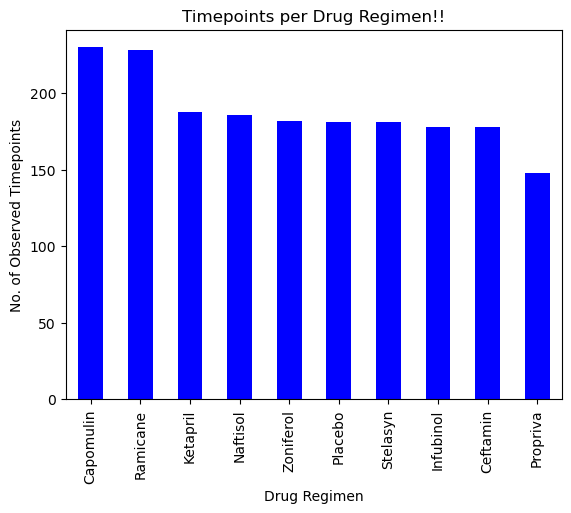

In [95]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
graph = new.loc[:, 'Drug Regimen'].value_counts().plot(kind='bar', color='blue')

plt.xlabel('Drug Regimen')
plt.ylabel('No. of Observed Timepoints')
plt.title('Timepoints per Drug Regimen!!')
plt.show()

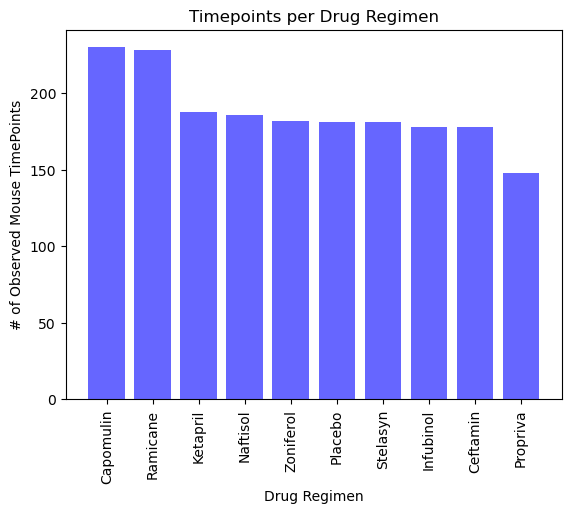

In [96]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
graph = new.loc[:, 'Drug Regimen'].value_counts() 

x = graph.index
y = graph

plt.bar(x, y, color='blue', alpha=0.6, align='center')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse TimePoints')
plt.title('Timepoints per Drug Regimen')

plt.xticks(rotation=90) #Code taken  from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.show()


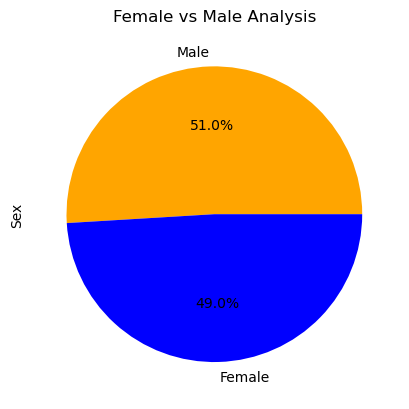

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

female_vs_male = new.loc[:, 'Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'blue']) #Code taken from https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
plt.title('Female vs Male Analysis')
plt.ylabel("Sex")
plt.show()




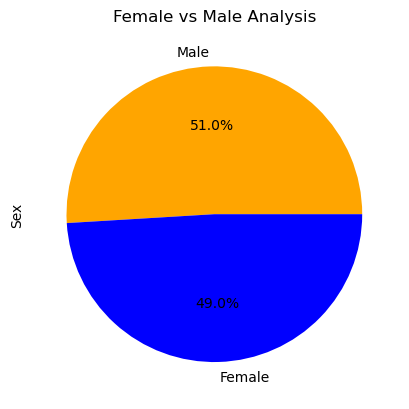

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_vs_male = new.loc[:, 'Sex'].value_counts()
x = female_vs_male
y = female_vs_male.index 

plt.pie(x, labels=y, autopct='%1.1f%%', colors=['orange', 'blue'])
plt.title('Female vs Male Analysis')
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

medical = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']  #Drug List 

t_list = []  #Tumor 

for x in medical:
    last = new.loc[new['Drug Regimen'] == x].groupby("Mouse ID")['Timepoint'].max()
    
    drug_list = pd.merge(new.loc[last], new, on=["Mouse ID", "Timepoint"], how='left')
    
    t_list.append(drug_list)

finaltumorvol = pd.concat(t_list)


finaltumorvol.head()
t_list

[   Mouse ID Drug Regimen_x   Sex_x  Age_months_x  Weight (g)_x  Timepoint  \
 0      g791       Ramicane    Male            11            16         25   
 1      g791       Ramicane    Male            11            16         25   
 2      x401      Capomulin  Female            16            15          0   
 3      g791       Ramicane    Male            11            16         25   
 4      g791       Ramicane    Male            11            16         25   
 5      g791       Ramicane    Male            11            16         25   
 6      g791       Ramicane    Male            11            16         25   
 7      g791       Ramicane    Male            11            16         25   
 8      m601      Capomulin    Male            22            17         25   
 9      g791       Ramicane    Male            11            16         25   
 10     g791       Ramicane    Male            11            16         25   
 11     g791       Ramicane    Male            11            16 

In [100]:


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

outliers = []

for i in medical:
    t = new.loc[new['Drug Regimen'] == i, 'Tumor Volume (mm3)']
    
    quartiles = t.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq 
    
    lowerb = lowerq - (1.5 * iqr)
    upperb = upperq + (1.5 * iqr)
    
    outlier = t[~t.between(lowerb, upperb)] 
    
    outliers.append(outlier.reset_index())
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    print(f"Values below {lowerb} could be outliers: {outlier[outlier < lowerb]}")
    print(f"Values above {upperb} could be outliers: {outlier[outlier > upperb]}")
    print(f"{i} equates to potential outliers")


Values below 26.714832162499995 could be outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Values above 55.9711007025 could be outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin equates to potential outliers
Values below 24.1865864625 could be outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Values above 57.488048122500004 could be outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane equates to potential outliers
Values below 32.309217298749985 could be outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Values above 72.31757996875001 could be outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol equates to potential outliers
Values below 32.81891142624998 could be outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Values above 71.19095325625001 could be outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin equates to potential outliers


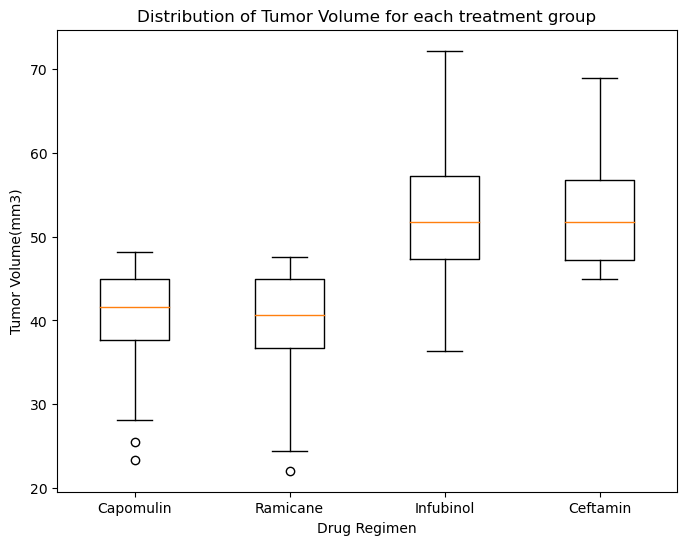

In [101]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot([new.loc[new['Drug Regimen'] == i]['Tumor Volume (mm3)'] for i in medical])
            
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume(mm3)')
ax.set_title('Distribution of Tumor Volume for each treatment group')

x_axis = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
ax.set_xticklabels(x_axis)

plt.show()

## Line and Scatter Plots

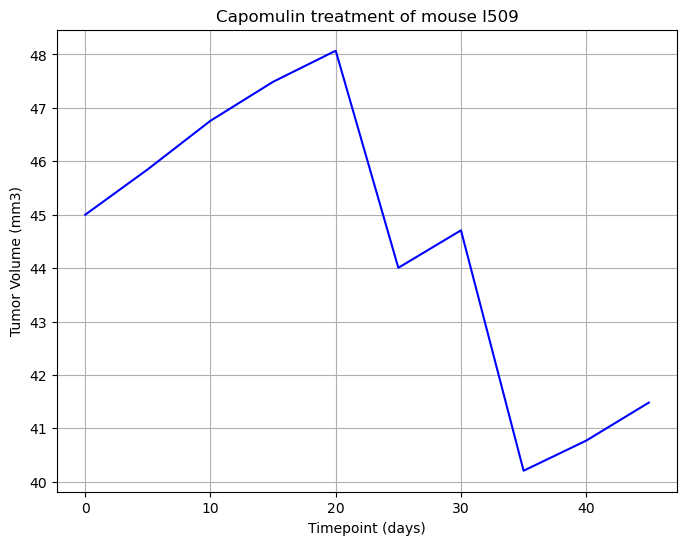

In [102]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 'l509'

c_mouse = new.loc[(new['Drug Regimen'] == 'Capomulin') & (new['Mouse ID'] == mouse_id)]

plt.figure(figsize = (8,6))
plt.plot(c_mouse['Timepoint'], c_mouse['Tumor Volume (mm3)'], color='blue', label=f'Mouse {mouse_id}')

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse I509')

plt.grid(True)
plt.show()




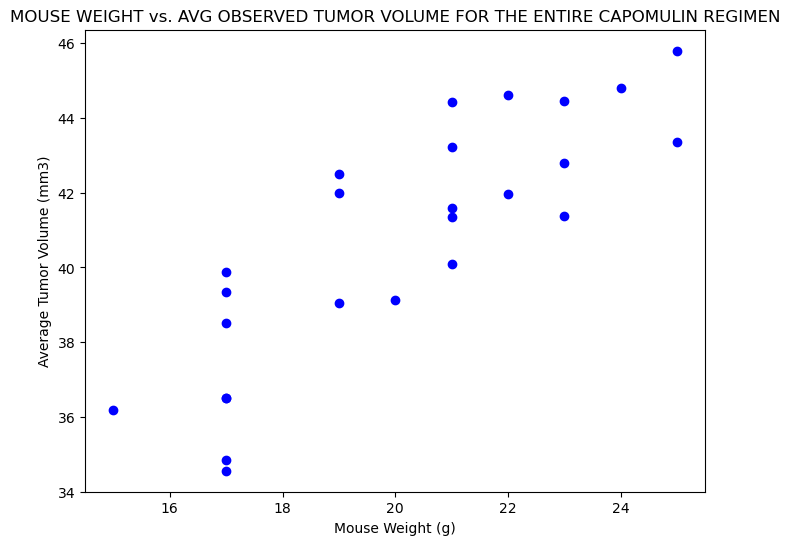

In [103]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

cap = new.loc[new['Drug Regimen'] == 'Capomulin']

avg = cap.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merging = pd.merge(cap[['Mouse ID', 'Weight (g)']].drop_duplicates(), avg, on='Mouse ID')

plt.figure(figsize=(8,6))
plt.scatter(merging['Weight (g)'], merging['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('MOUSE WEIGHT vs. AVG OBSERVED TUMOR VOLUME FOR THE ENTIRE CAPOMULIN REGIMEN')

plt.show()


## Correlation and Regression

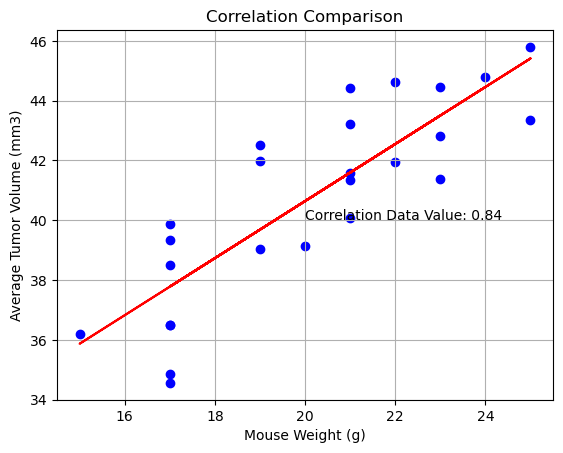

In [104]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import pearsonr #Code taken from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html


#X_Cap = Mouse Weight (Independent Variable), "Y_Cap" = Average Observed Tumor Volume (Dependent Variable)
x_cap = cap.groupby('Mouse ID')['Weight (g)'].mean().values.reshape(-1,1) #Added valuesreshape due to array error in output 
y_cap = cap.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().values

model = LinearRegression()
model.fit(x_cap, y_cap)

slope = model.coef_[0]
int_slope = model.intercept_ 

line_correlation = model.predict(x_cap)
calculation,_ = pearsonr(x_cap.flatten(), y_cap)

plt.scatter(x_cap, y_cap, color='blue')
plt.plot(x_cap, line_correlation, color='red')

plt.annotate(f'Correlation Data Value: {calculation:.2f}', xy = (20,40), color='black', fontsize=10)
plt.title('Correlation Comparison')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

